<div style="text-align: center;">
  <h2>Stage 1: Data Preparation and Initial Exploration</h2>
</div>

### **Importing libraries, installing packages and defining functions**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from scipy.stats import binom
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier



warnings.filterwarnings('ignore')

In [3]:
#package installation

#pip install pandas
#pip install seaborn
#pip install numpy
#pip install scipy
#pip install scikit-learn

The function below allows us to format the values adding an 'M' that stands for millions or 'T' for thousands, for better visibility.

In [4]:
def millions_formatter(x, pos):
    return f'{x / 1e6} M'

def thousands_formatter(x, pos):
    return f'{x / 1e3} K'

def standard_decimal_notation_formatter(x):
    return '{:.2f}'.format(x)

### **1. Load and import the datasets**

In [5]:
population_df = pd.read_csv('PEA11.20231013T111046.csv')
migration_df = pd.read_csv('PEA18.20231016T141007.csv')

The first data set I am going to use is the population estimates in April from 1926 to 2023.  
The second data set is for the migration estimates from 1987 to 2023

### **2.	Examine the structure and shape of the datasets**

#### Get the size of the dataset

In [6]:
population_dataset_size = population_df.size
migration_dataset_size = migration_df.size

In [7]:
print("There are", population_dataset_size, "values in total across the whole population dataset")
print("There are", migration_dataset_size, "values in total across the whole migration dataset")

There are 118170 values in total across the whole population dataset
There are 31968 values in total across the whole migration dataset


#### Get the shape of the datasets

In [8]:
pop_rows, pop_columns = population_df.shape
mig_rows, mig_columns = migration_df.shape

print(f"For the population dataset the number of rows is {pop_rows}, the number of columns is {pop_columns}")
print(f"For the migration dataset the number of rows is {mig_rows}, the number of columns is {mig_columns}")

For the population dataset the number of rows is 11817, the number of columns is 10
For the migration dataset the number of rows is 2664, the number of columns is 12


#### Sample data

Displaying the first few rows of the data, to get a sense of what the data looks like

In [9]:
print("Population dataset")
population_df.head(7)

Population dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,PEA11,Population estimates from 1926,1926,1926,-,All ages,-,Both sexes,Number,2971992
1,PEA11,Population estimates from 1926,1926,1926,-,All ages,1,Male,Number,1506889
2,PEA11,Population estimates from 1926,1926,1926,-,All ages,2,Female,Number,1465103
3,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,-,Both sexes,Number,55391
4,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,1,Male,Number,28084
5,PEA11,Population estimates from 1926,1926,1926,200,Under 1 year,2,Female,Number,27307
6,PEA11,Population estimates from 1926,1926,1926,001,1 year,-,Both sexes,Number,55876


In [10]:
print("Migration dataset")
migration_df.head(7)

Migration dataset


,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,PEA18,Estimated Migration (Persons in April),1987,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


#### Data types and info

In [11]:
print(f"Population dataset info:")
print()
population_df.info()

Population dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11817 entries, 0 to 11816
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC           11817 non-null  object
 1   STATISTIC Label     11817 non-null  object
 2   TLIST(A1)           11817 non-null  int64 
 3   Year                11817 non-null  int64 
 4   C02076V03371        11817 non-null  object
 5   Single Year of Age  11817 non-null  object
 6   C02199V02655        11817 non-null  object
 7   Sex                 11817 non-null  object
 8   UNIT                11817 non-null  object
 9   VALUE               11817 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 923.3+ KB


Most of the types are objects, which later on we will convert to categories.

In [12]:
print("Migration dataset info:")
print()
migration_df.info()

Migration dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STATISTIC              2664 non-null   object 
 1   STATISTIC Label        2664 non-null   object 
 2   TLIST(A1)              2664 non-null   int64  
 3   Year                   2664 non-null   int64  
 4   C02719V03286           2664 non-null   object 
 5   Country                2664 non-null   object 
 6   C02199V02655           2664 non-null   object 
 7   Sex                    2664 non-null   object 
 8   C02542V03077           2664 non-null   int64  
 9   Origin or Destination  2664 non-null   object 
 10  UNIT                   2664 non-null   object 
 11  VALUE                  2104 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 249.9+ KB


#### Column names

In [13]:
population_column_names = population_df.columns
migration_column_names = migration_df.columns

In [14]:
print("Population dataset column names:", list(population_column_names))
print()
print("Migration dataset column names:", list(migration_column_names))

Population dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02076V03371', 'Single Year of Age', 'C02199V02655', 'Sex', 'UNIT', 'VALUE']

Migration dataset column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C02719V03286', 'Country', 'C02199V02655', 'Sex', 'C02542V03077', 'Origin or Destination', 'UNIT', 'VALUE']


#### Descriptive statistics

Obtaining descriptive statistics for numerical columns, including count, mean, standard deviation, minimum, and maximum

In [15]:
population_summary = population_df.describe()
migration_summary = migration_df.describe()

In [16]:
population_summary

,TLIST(A1),Year,VALUE
count,11817.000000,11817.000000,1.181700e+04
mean,1996.410256,1996.410256,5.352461e+04
std,24.463165,24.463165,2.867754e+05
min,1926.000000,1926.000000,6.000000e+00
25%,1986.000000,1986.000000,1.242700e+04
50%,2004.000000,2004.000000,2.667500e+04
75%,2014.000000,2014.000000,3.557700e+04
max,2023.000000,2023.000000,5.281612e+06


In [17]:
migration_summary

,TLIST(A1),Year,C02542V03077,VALUE
count,2664.000000,2664.000000,2664.000000,2104.000000
mean,2005.000000,2005.000000,3.333333,8.943726
std,10.679083,10.679083,1.699992,15.513703
min,1987.000000,1987.000000,1.000000,-43.900000
25%,1996.000000,1996.000000,1.000000,1.800000
50%,2005.000000,2005.000000,4.000000,4.700000
75%,2014.000000,2014.000000,5.000000,10.200000
max,2023.000000,2023.000000,5.000000,151.100000


### **3.	Perform basic data cleaning and data type conversion.**

#### Checking for Duplicates

In [18]:
population_duplicates = population_df.duplicated().sum()
print(f"Number of duplicate rows in the population dataset is {population_duplicates}")


Number of duplicate rows in the population dataset is 0


In [19]:
migration_duplicates = migration_df.duplicated().sum()
print(f"Number of duplicate rows in the migration dataset is {migration_duplicates}")

Number of duplicate rows in the migration dataset is 0


#### Handling Missing Values

##### Population dataset

In [20]:
population_missing_data = population_df.isna()
population_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
11812,False,False,False,False,False,False,False,False,False,False
11813,False,False,False,False,False,False,False,False,False,False
11814,False,False,False,False,False,False,False,False,False,False
11815,False,False,False,False,False,False,False,False,False,False


##### Migration dataset

In [21]:
migration_missing_data = migration_df.isna()
migration_missing_data

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2659,False,False,False,False,False,False,False,False,False,False,False,False
2660,False,False,False,False,False,False,False,False,False,False,False,False
2661,False,False,False,False,False,False,False,False,False,False,False,False
2662,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
population_missing_values = population_df.isnull().sum()

print('Missing values for the population dataset')
population_missing_values

Missing values for the population dataset


STATISTIC             0
STATISTIC Label       0
TLIST(A1)             0
Year                  0
C02076V03371          0
Single Year of Age    0
C02199V02655          0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [23]:
migration_missing_values = migration_df.isnull().sum()

print('Missing values for the migration dataset')
migration_missing_values

Missing values for the migration dataset


STATISTIC                  0
STATISTIC Label            0
TLIST(A1)                  0
Year                       0
C02719V03286               0
Country                    0
C02199V02655               0
Sex                        0
C02542V03077               0
Origin or Destination      0
UNIT                       0
VALUE                    560
dtype: int64

Using a heatmap is a simple way to visualize missing values and determine if there are any in the datasets we're using.

Population dataset missing values Heatmap


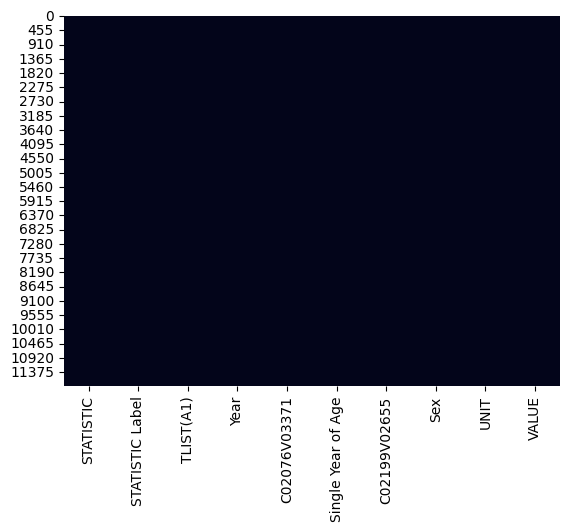

In [24]:
print("Population dataset missing values Heatmap")
sns.heatmap(population_df.isnull(), cbar=False);

Migration dataset missing values Heatmap


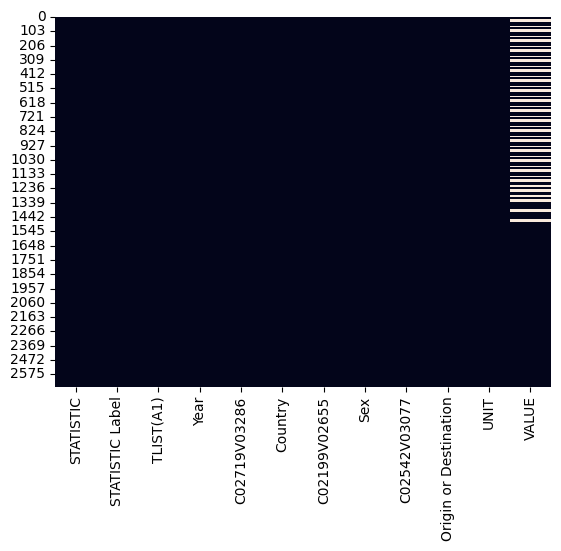

In [25]:
print("Migration dataset missing values Heatmap")
sns.heatmap(migration_df.isnull(), cbar=False);

##### Removing all the lines with missing values
The **.dropna()** method in pandas is used to remove missing values from a DataFrame. We can specify how we want to remove rows or columns with missing data using its parameters.

For example:\
**.dropna()** - drop any rows with at least one null value\
**.dropna(how='all')** - drop rows where all values are null\
**.dropna(axis=1)** - drop columns with at least one null value

Removing already identified missing values in the Migration Dataset. I decided to remove those values because for some years we do not have any data for Immigrants and Emigrants for specific countries. Imputing those values will give us bias data and this will reflect on our visualizations. As an example, we do have a value for the 'Country' column called '"EU15 to EU27 (accession countries joined post 2004)', which will include countries that joined the EU in 2004, meaning that we won't have any data before that. 

In [26]:
migration_df = migration_df.dropna()

migration_missing_values = migration_df.isnull().sum()
migration_missing_values

STATISTIC                0
STATISTIC Label          0
TLIST(A1)                0
Year                     0
C02719V03286             0
Country                  0
C02199V02655             0
Sex                      0
C02542V03077             0
Origin or Destination    0
UNIT                     0
VALUE                    0
dtype: int64

<Axes: >

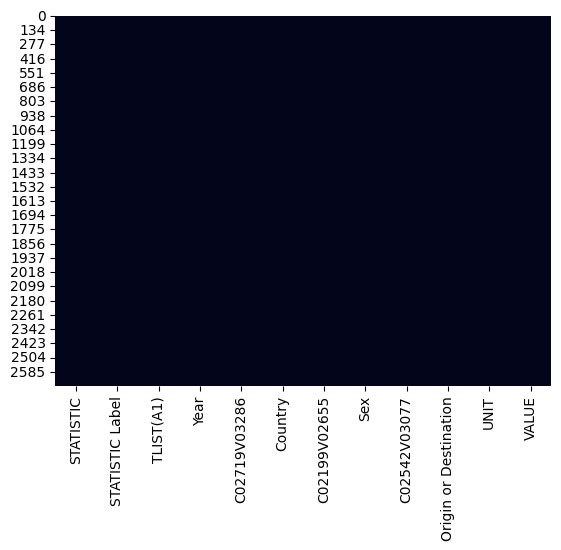

In [27]:
sns.heatmap(migration_df.isnull(), cbar=False)

Based on the two analyses conducted (sum and heatmap), we can conclude that all missing values have been removed from the Migration dataset.

#### Dropping irrelevant columns and renaming the labeled columns

Dropping all columns that have no value for the report and visualizing the results.

##### Population dataset

In [28]:
population_df = population_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
population_df

,Year,C02076V03371,Single Year of Age,C02199V02655,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
...,...,...,...,...,...,...,...
11812,2023,098,98 years,1,Male,Number,197
11813,2023,098,98 years,2,Female,Number,632
11814,2023,646,99 years and over,-,Both sexes,Number,1600
11815,2023,646,99 years and over,1,Male,Number,352


Renaming columns

In [29]:
population_df = population_df.rename(columns={'C02076V03371':'Age category', 'C02199V02655':'Sex category'})
population_df.head(7)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
0,1926,-,All ages,-,Both sexes,Number,2971992
1,1926,-,All ages,1,Male,Number,1506889
2,1926,-,All ages,2,Female,Number,1465103
3,1926,200,Under 1 year,-,Both sexes,Number,55391
4,1926,200,Under 1 year,1,Male,Number,28084
5,1926,200,Under 1 year,2,Female,Number,27307
6,1926,001,1 year,-,Both sexes,Number,55876


##### Migration dataset

In [30]:
migration_df = migration_df.drop(['STATISTIC', 'STATISTIC Label', 'TLIST(A1)'], axis=1)
migration_df.head(7)

,Year,C02719V03286,Country,C02199V02655,Sex,C02542V03077,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


Renaming columns

In [31]:
migration_df = migration_df.rename(columns={'C02719V03286':'Country category', 'C02199V02655':'Sex category', 'C02542V03077':'Migration label' })
migration_df.head(7)

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
0,1987,GB1,United Kingdom (1),-,Both sexes,1,Net migration,Thousand,-13.7
1,1987,GB1,United Kingdom (1),-,Both sexes,4,Emigrants: All destinations,Thousand,21.8
2,1987,GB1,United Kingdom (1),-,Both sexes,5,Immigrants: All origins,Thousand,8.1
3,1987,GB1,United Kingdom (1),1,Male,1,Net migration,Thousand,-9.0
4,1987,GB1,United Kingdom (1),1,Male,4,Emigrants: All destinations,Thousand,13.1
5,1987,GB1,United Kingdom (1),1,Male,5,Immigrants: All origins,Thousand,4.1
6,1987,GB1,United Kingdom (1),2,Female,1,Net migration,Thousand,-4.7


#### Dealing with categorical variables

Converting the objects to categories is a step towards encoding features as numerical values, required for fitting machine learning models.

In [32]:
population_columns_to_convert = ['Single Year of Age', 'Sex', 'UNIT', 'Age category', 'Sex category']
for column in population_columns_to_convert:
    population_df[column] = population_df[column].astype('category')

data_types = population_df[population_columns_to_convert].dtypes
data_types

Single Year of Age    category
Sex                   category
UNIT                  category
Age category          category
Sex category          category
dtype: object

In [33]:
migration_columns_to_convert = ['Sex', 'UNIT', 'Sex category', 'Origin or Destination', 'Migration label', 'Country', 'Country category']
for column in migration_columns_to_convert:
    migration_df[column] = migration_df[column].astype('category')

data_types = migration_df[migration_columns_to_convert].dtypes
data_types

Sex                      category
UNIT                     category
Sex category             category
Origin or Destination    category
Migration label          category
Country                  category
Country category         category
dtype: object

#### **Dealing with Outliers**

* Outliers are data points that differ significantly from other observations. They can be caused by variability in the measurement or may indicate errors. Sometimes outliers are just due to natural deviations in any distribution. It's crucial to deal with outliers because they can have a significant impact on the results of statistical analyses and machine learning models, often leading to misleading conclusions.
* Outliers can skew the results of statistical measures. For instance, the mean is particularly sensitive to outliers, as a single outlier can significantly shift the average. The median and mode are more robust, but it's still important to understand the nature of the outliers.
* In machine learning, outliers can affect the accuracy of predictions, leading to poor model performance. Machine learning algorithms might end up overfitting to outliers if they try to account for these anomalous points in the training data. 

Calculate the first quartile (**Q1**) and the third quartile (**Q3**) for the data.\
Compute the **IQR**: IQR Q3 — QI\
**Define outliers** as values that fall outside of the following range:\
**QI - 1.5 x IQR,Q3 + 1.5 x IQR**

A classic method for identifying outliers based on the interquartile range (IQR). This method assumes that values outside 1.5 times the IQR from the quartiles are outliers.

##### Population dataset

Exploring the VALUE column for any outliers whithout filtering the data

In [34]:
population_Q1 = population_df['VALUE'].quantile(0.25)
population_Q3 = population_df['VALUE'].quantile(0.75)
population_IQR = population_Q3 - population_Q1

pop_lower_bound = population_Q1 - 1.5 * population_IQR
pop_upper_bound = population_Q3 + 1.5 * population_IQR

population_outliers = population_df[(population_df['VALUE'] < pop_lower_bound) | (population_df['VALUE'] > pop_upper_bound)]

print(f"The first quartile is: {population_Q1}")
print(f"The third quartile is: {population_Q3}")
print(f"IQR range: {population_IQR}")
print(f"Total number of outliers: {population_outliers.shape[0]}")
print(f"Percentage of outliers: {(population_outliers.shape[0] / population_df.shape[0]) * 100:.2f}%")
print(f"Minimum outlier value: {population_outliers['VALUE'].min()}")
print(f"Maximum outlier value: {population_outliers['VALUE'].max()}")
print(f"Lower bound for outliers: {pop_lower_bound}")
print(f"Upper bound for outliers: {pop_upper_bound}")


The first quartile is: 12427.0
The third quartile is: 35577.0
IQR range: 23150.0
Total number of outliers: 463
Percentage of outliers: 3.92%
Minimum outlier value: 70321
Maximum outlier value: 5281612
Lower bound for outliers: -22298.0
Upper bound for outliers: 70302.0


The lower bound for outliers is -22298. Since negative population values are not possible, we can consider the lower bound to be 0 for practical purposes.\
Any data point with a population value **lower than 0** or **higher than 70302** is considered an outlier.\

The current calculations includes the total population counts ("All ages") for both sexes, males, and females, which naturally have much higher numbers than specific age categories. These data points are not errors. They are just aggregates that are on a different scale compared to individual age categories.

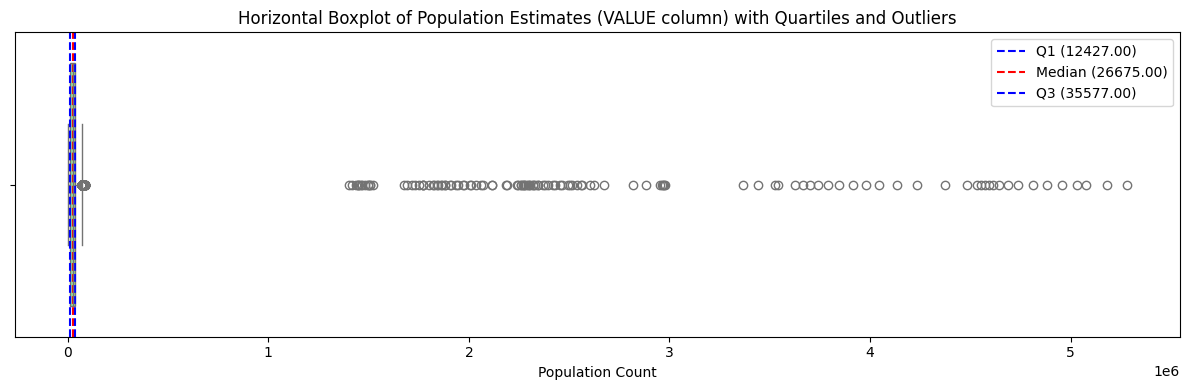

In [35]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=population_df['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=population_Q1, color='blue', linestyle='--', label=f"Q1 ({population_Q1:.2f})")
plt.axvline(x=population_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({population_df['VALUE'].median():.2f})")
plt.axvline(x=population_Q3, color='blue', linestyle='--', label=f"Q3 ({population_Q3:.2f})")

plt.title("Horizontal Boxplot of Population Estimates (VALUE column) with Quartiles and Outliers")
plt.xlabel("Population Count")
plt.legend()
plt.tight_layout()
plt.show()

Zoomed-in version of the horizontal boxplot for the VALUE column

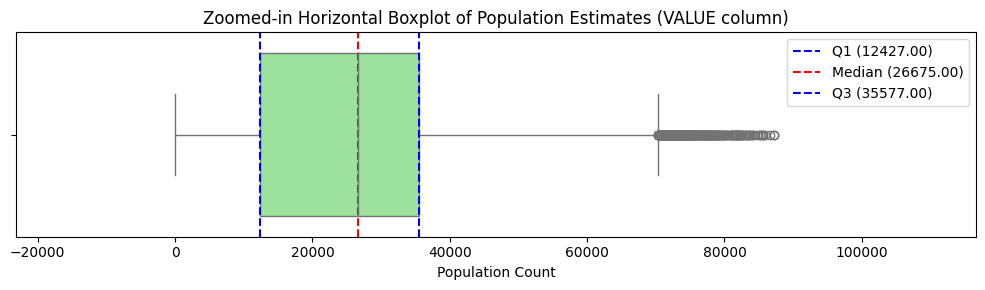

In [36]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=population_df['VALUE'], color="lightgreen", orient="h")
plt.xlim([population_df['VALUE'].min() - population_IQR, pop_upper_bound + 2 * population_IQR])

plt.axvline(x=population_Q1, color='blue', linestyle='--', label=f"Q1 ({population_Q1:.2f})")
plt.axvline(x=population_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({population_df['VALUE'].median():.2f})")
plt.axvline(x=population_Q3, color='blue', linestyle='--', label=f"Q3 ({population_Q3:.2f})")

plt.title("Zoomed-in Horizontal Boxplot of Population Estimates (VALUE column)")
plt.xlabel("Population Count")
plt.legend()
plt.tight_layout()
plt.show()

This visualization provides a more detailed view of the distribution's central tendency, interquartile range, and nearby outliers

The focus has been narrowed to the region around the box and the nearby outliers, allowing for a clearer view of the box and whiskers. \
The dashed lines still represent the Q1 (blue), median (red), and Q3 (blue) values.

**The outliers in the population dataset are because we have rows with 'All ages' and 'Both sexes' that show the sum of all ages and both sexes. Those are not errors and can be used when looking into the population without any age or sex breakdown**

In [37]:
population_df_outliers = population_df[(population_df['Single Year of Age'] != 'All ages') & (population_df['Sex'] != 'Both sexes')]
population_df_outliers.head(7)

,Year,Age category,Single Year of Age,Sex category,Sex,UNIT,VALUE
4,1926,200,Under 1 year,1,Male,Number,28084
5,1926,200,Under 1 year,2,Female,Number,27307
7,1926,001,1 year,1,Male,Number,28374
8,1926,001,1 year,2,Female,Number,27502
10,1926,002,2 years,1,Male,Number,29728
11,1926,002,2 years,2,Female,Number,28545
13,1926,003,3 years,1,Male,Number,29872


In [38]:
pop_all_Q1 = population_df_outliers['VALUE'].quantile(0.25)
pop_all_Q3 = population_df_outliers['VALUE'].quantile(0.75)
pop_all_IQR = pop_all_Q3 - pop_all_Q1

pop_all_lower_bound = pop_all_Q1 - 1.5 * pop_all_IQR
pop_all_upper_bound = pop_all_Q3 + 1.5 * pop_all_IQR

pop_all_outliers = population_df_outliers[(population_df_outliers['VALUE'] < pop_all_lower_bound) | (population_df_outliers['VALUE'] > pop_all_upper_bound)]

print(f"The first quartile is: {pop_all_Q1}")
print(f"The third quartile is: {pop_all_Q3}")
print(f"IQR range: {pop_all_IQR}")
print(f"Total number of outliers: {pop_all_outliers.shape[0]}")
print(f"Percentage of outliers: {(pop_all_outliers.shape[0] / population_df_outliers.shape[0]) * 100:.2f}%")
print(f"Minimum outlier value: {pop_all_outliers['VALUE'].min()}")
print(f"Maximum outlier value: {pop_all_outliers['VALUE'].max()}")
print(f"Lower bound for outliers: {pop_all_lower_bound}")
print(f"Upper bound for outliers: {pop_all_upper_bound}")

The first quartile is: 10576.75
The third quartile is: 30243.0
IQR range: 19666.25
Total number of outliers: 0
Percentage of outliers: 0.00%
Minimum outlier value: nan
Maximum outlier value: nan
Lower bound for outliers: -18922.625
Upper bound for outliers: 59742.375


The first quartile is the value below which 25% of the data can be found. It is calculated using the .quantile(0.25) method, which returns the value at the 25th percentile.
The third quartile is the value below which 75% of the data can be found. It's computed with .quantile(0.75), which returns the value at the 75th percentile.
From there we can calculate the IQR which is a measure of dispersion. The IQR represents the middle 50% of the data and is used to measure the spread.

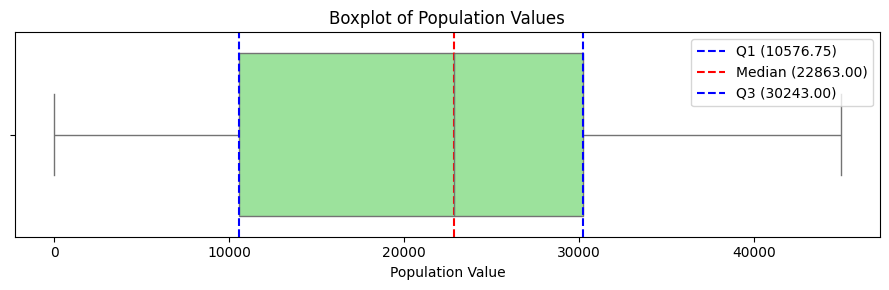

In [39]:
plt.figure(figsize=(9, 3))
sns.boxplot(x=population_df_outliers['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=pop_all_Q1, color='blue', linestyle='--', label=f"Q1 ({pop_all_Q1:.2f})")
plt.axvline(x=population_df_outliers['VALUE'].median(), color='red', linestyle='--', label=f"Median ({population_df_outliers['VALUE'].median():.2f})")
plt.axvline(x=pop_all_Q3, color='blue', linestyle='--', label=f"Q3 ({pop_all_Q3:.2f})")

plt.title('Boxplot of Population Values')
plt.xlabel('Population Value')
plt.legend()
plt.tight_layout()
plt.show()

**Migration dataset**

In [40]:
migration_Q1 = migration_df['VALUE'].quantile(0.25)
migration_Q3 = migration_df['VALUE'].quantile(0.75)
migration_IQR = migration_Q3 - migration_Q1

migr_lower_bound = migration_Q1 - 1.5 * migration_IQR
migr_upper_bound = migration_Q3 + 1.5 * migration_IQR

migration_outliers = migration_df[(migration_df['VALUE'] < migr_lower_bound) | (migration_df['VALUE'] > migr_upper_bound)]

print("Info: Based on the dataset all the values are in thousands\n")
print(f"The first quartile is: {migration_Q1}K")
print(f"The third quartile is: {migration_Q3}K")
print(f"IQR range: {migration_IQR:.2f}K")
print(f"Total number of outliers: {migration_outliers.shape[0]}")
print(f"Percentage of outliers: {(migration_outliers.shape[0] / migration_df.shape[0]) * 100:.2f}%")
print(f"Minimum outlier value: {migration_outliers['VALUE'].min()}K")
print(f"Maximum outlier value: {migration_outliers['VALUE'].max()}K")
print(f"Lower bound for outliers: {migr_lower_bound:.2f}K")
print(f"Upper bound for outliers: {migr_upper_bound:.2f}K")


Info: Based on the dataset all the values are in thousands

The first quartile is: 1.8K
The third quartile is: 10.2K
IQR range: 8.40K
Total number of outliers: 257
Percentage of outliers: 12.21%
Minimum outlier value: -43.9K
Maximum outlier value: 151.1K
Lower bound for outliers: -10.80K
Upper bound for outliers: 22.80K


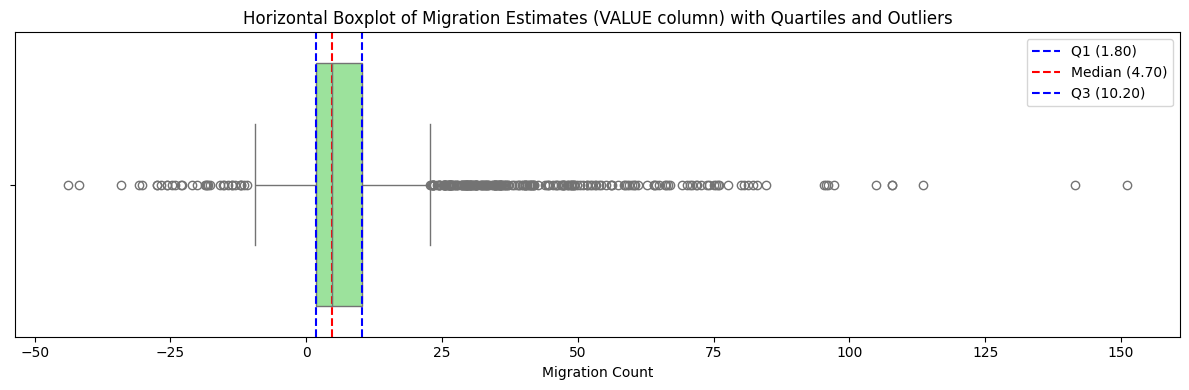

In [41]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=migration_df['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=migration_Q1, color='blue', linestyle='--', label=f"Q1 ({migration_Q1:.2f})")
plt.axvline(x=migration_df['VALUE'].median(), color='red', linestyle='--', label=f"Median ({migration_df['VALUE'].median():.2f})")
plt.axvline(x=migration_Q3, color='blue', linestyle='--', label=f"Q3 ({migration_Q3:.2f})")

plt.title("Horizontal Boxplot of Migration Estimates (VALUE column) with Quartiles and Outliers")
plt.xlabel("Migration Count")
plt.legend()
plt.tight_layout()
plt.show()

The same behaviour is present in the migration dataset. We have rows that give us the sum for 'All countries' and 'Both sexes', which results in higer values for the 'VALUE' column. Those are not errors, but the data is aggregated on a different level. Creating a new dataframe showing the Migration for 'All countries' and 'Both sexes' will be used in the analysis, and a second dataframe that will give us the breakdown by country and sex. 

In [42]:
migration_df_outliers = migration_df[
    (migration_df['Sex'] != 'Both sexes') & 
    (migration_df['Country'] == 'All countries') & 
    (migration_df['Origin or Destination'] == 'Net migration')]

migration_df_outliers

,Year,Country category,Country,Sex category,Sex,Migration label,Origin or Destination,UNIT,VALUE
48,1987,-,All countries,1,Male,1,Net migration,Thousand,-13.6
51,1987,-,All countries,2,Female,1,Net migration,Thousand,-15.1
120,1988,-,All countries,1,Male,1,Net migration,Thousand,-24.2
123,1988,-,All countries,2,Female,1,Net migration,Thousand,-26.7
192,1989,-,All countries,1,Male,1,Net migration,Thousand,-25.6
...,...,...,...,...,...,...,...,...,...
2499,2021,-,All countries,2,Female,1,Net migration,Thousand,11.0
2568,2022,-,All countries,1,Male,1,Net migration,Thousand,19.6
2571,2022,-,All countries,2,Female,1,Net migration,Thousand,32.1
2640,2023,-,All countries,1,Male,1,Net migration,Thousand,35.1


In [43]:
migr_net_Q1 = migration_df_outliers['VALUE'].quantile(0.25)
migr_net_Q3 = migration_df_outliers['VALUE'].quantile(0.75)

migr_net_IQR = migr_net_Q3 - migr_net_Q1

migr_net_lower_bound = migr_net_Q1 - 1.5 * migr_net_IQR
migr_net_upper_bound = migr_net_Q3 + 1.5 * migr_net_IQR

migration_net_outliers = migration_df_outliers[(migration_df_outliers['VALUE'] < migr_net_lower_bound) | (migration_df_outliers['VALUE'] > migr_net_upper_bound)]

print("Info: Base on the dataset all the values are in thousands\n")
print(f"The first quartile is: {migr_net_Q1}K")
print(f"The third quartile is: {migr_net_Q3}K")
print(f"IQR range: {migr_net_IQR:.2f}K")
print(f"Total number of outliers: {migration_net_outliers.shape[0]}")
print(f"Percentage of outliers: {(migration_net_outliers.shape[0] / migration_df_outliers.shape[0]) * 100:.2f}%")
print(f"Minimum outlier value: {migration_net_outliers['VALUE'].min()}")
print(f"Maximum outlier value: {migration_net_outliers['VALUE'].max()}")
print(f"Lower bound for outliers: {migr_lower_bound:.2f}K")
print(f"Upper bound for outliers: {migr_upper_bound:.2f}K")

Info: Base on the dataset all the values are in thousands

The first quartile is: -4.675K
The third quartile is: 20.725K
IQR range: 25.40K
Total number of outliers: 0
Percentage of outliers: 0.00%
Minimum outlier value: nan
Maximum outlier value: nan
Lower bound for outliers: -10.80K
Upper bound for outliers: 22.80K


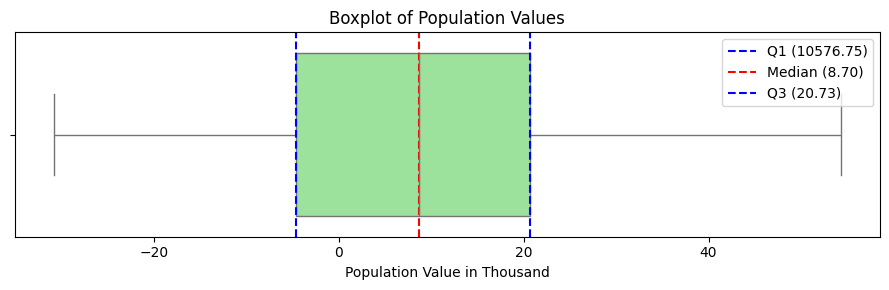

In [44]:
plt.figure(figsize=(9, 3))
sns.boxplot(x=migration_df_outliers['VALUE'], color="lightgreen", orient="h")

plt.axvline(x=migr_net_Q1, color='blue', linestyle='--', label=f"Q1 ({pop_all_Q1:.2f})")
plt.axvline(x=migration_df_outliers['VALUE'].median(), color='red', linestyle='--', label=f"Median ({migration_df_outliers['VALUE'].median():.2f})")
plt.axvline(x=migr_net_Q3, color='blue', linestyle='--', label=f"Q3 ({migr_net_Q3:.2f})")

plt.title('Boxplot of Population Values')
plt.xlabel('Population Value in Thousand')
plt.legend()
plt.tight_layout()
plt.show()

### **4.	Generate summary statistics, including measures of central tendency and variability.**

##### Population dataset

Visualizing overall statistics of the columns with numeric values.

In [45]:
population_df.describe()

,Year,VALUE
count,11817.000000,1.181700e+04
mean,1996.410256,5.352461e+04
std,24.463165,2.867754e+05
min,1926.000000,6.000000e+00
25%,1986.000000,1.242700e+04
50%,2004.000000,2.667500e+04
75%,2014.000000,3.557700e+04
max,2023.000000,5.281612e+06


Preparing and visualizing overall statistics about the population separated by 'sex' - male and female.

In [46]:
population_male_data = population_df[(population_df['Sex'] == 'Male') & (population_df['Single Year of Age'] == 'All ages')]
population_female_data = population_df[(population_df['Sex'] == 'Female') & (population_df['Single Year of Age'] == 'All ages')]
pop_unq_years = population_df['Year'].unique()
pop_male_values = population_male_data['VALUE'].values
pop_female_values = population_female_data['VALUE'].values

In [47]:
population_table = pd.DataFrame({'Year': pop_unq_years, 'Male Population': pop_male_values, 'Female Population': pop_female_values})
population_table.head(7)

,Year,Male Population,Female Population
0,1926,1506889,1465103
1,1936,1520454,1447966
2,1946,1494877,1460230
3,1951,1506597,1453996
4,1961,1416549,1401792
5,1966,1449032,1434970
6,1971,1495760,1482488


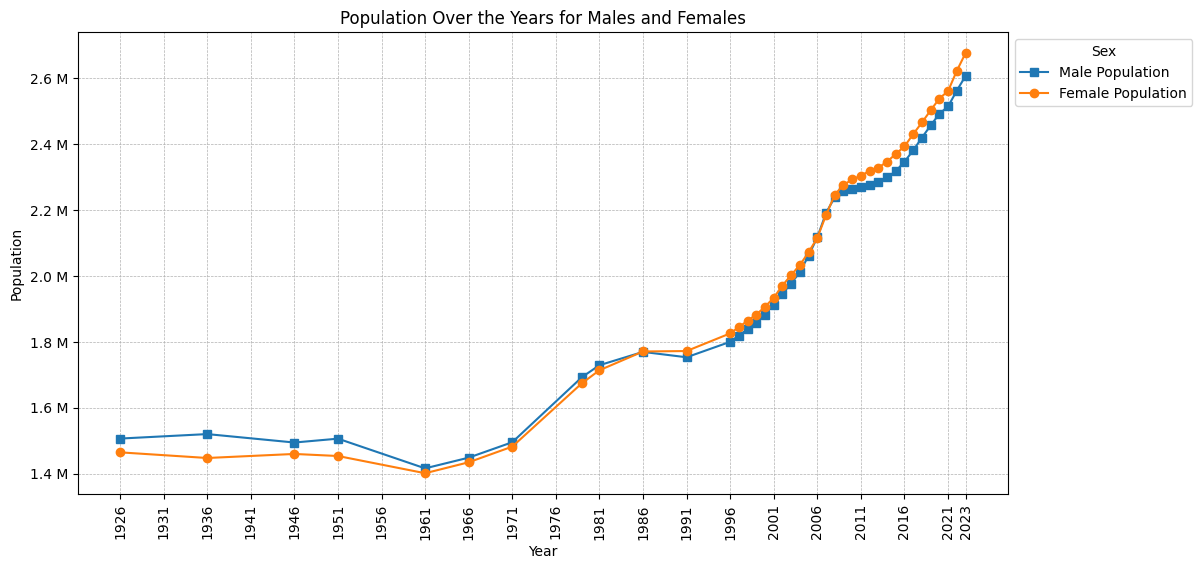

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(pop_unq_years, pop_male_values, label='Male Population', marker='s')
plt.plot(pop_unq_years, pop_female_values, label='Female Population', marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over the Years for Males and Females')

plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 5
xticks = [pop_unq_years[0], pop_unq_years[-1]] + list(range(pop_unq_years[0] + tick_interval, pop_unq_years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend(title='Sex', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

The comprehensive population trends in Ireland reveal a steady increase in both male and female populations over the years.

For practical purposes I'll cut and work with data between 1996 and 2023 for both datasets. As we do not have consistent data for the population before 1996 (from the population_table above we can see that we have data for 1926, then for 1936), I will only be working with the data starting from 1996. Same was applied for the migration data, so that we can have the same values for the Year column for the machine learning.

In [49]:
population_df_1996 = population_df[(population_df['Year'] >= 1996)]
migration_df_1996 = migration_df[(migration_df['Year'] >= 1996)]

In [50]:
emigrants = migration_df[(migration_df['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
immigrants = migration_df[(migration_df['Origin or Destination'] == 'Immigrants: All origins') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
net_migration = migration_df[(migration_df['Origin or Destination'] == 'Net migration') & (migration_df['Sex'] == 'Both sexes') & (migration_df['VALUE'] != 'NaN') & (migration_df['Country'] == 'All countries')]
migration_years = migration_df['Year'].unique()
emigrants_values = emigrants['VALUE'].values
immigrants_values = immigrants['VALUE'].values
net_migration_values = net_migration['VALUE'].values

emigration_and_migration = pd.DataFrame({'Years': migration_years, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values, 'Net migration': net_migration_values})

emigration_and_migration

,Years,Emigrants,Immigrants,Net migration
0,1987,40.2,17.2,-23.0
1,1988,61.1,19.2,-41.9
2,1989,70.6,26.7,-43.9
3,1990,56.3,33.3,-22.9
4,1991,35.3,33.3,-2.0
5,1992,33.4,40.7,7.4
6,1993,35.1,34.7,-0.4
7,1994,34.8,30.1,-4.7
8,1995,33.1,31.2,-1.9
9,1996,31.2,39.2,8.0


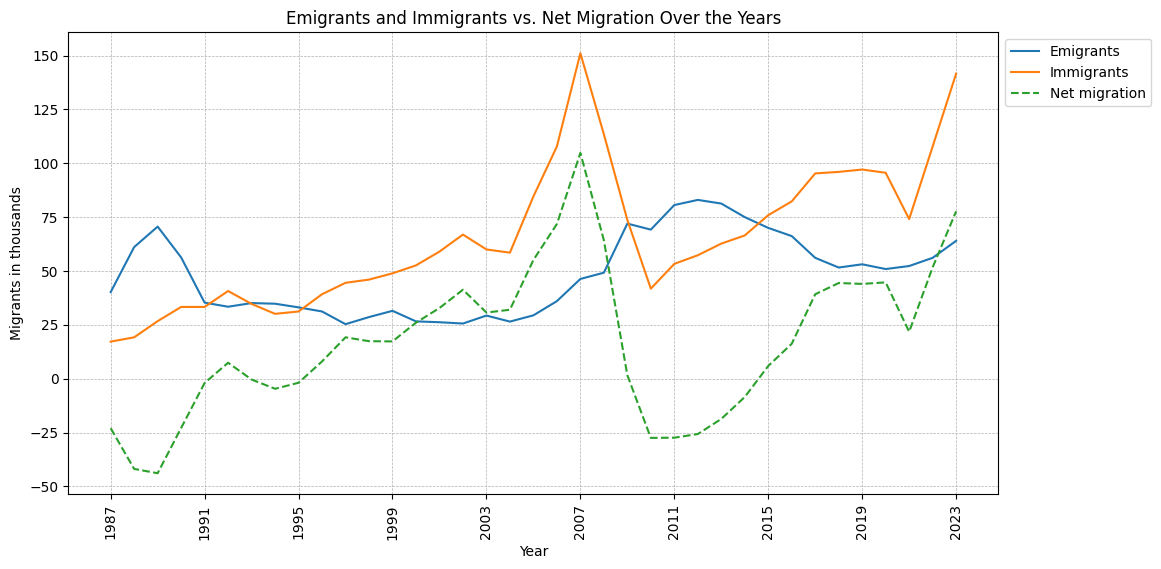

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(migration_years, emigrants_values, label='Emigrants', marker='')
plt.plot(migration_years, immigrants_values, label='Immigrants', marker='')
plt.plot(migration_years, net_migration_values, label='Net migration', linestyle = '--', marker='')
plt.xlabel('Year')
plt.ylabel('Migrants in thousands')
plt.title('Emigrants and Immigrants vs. Net Migration Over the Years')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 4
xticks = [migration_years[0], migration_years[-1]] + list(range(migration_years[0] + tick_interval, migration_years[-1], tick_interval))
plt.xticks(xticks, rotation = 90)
plt.legend(title='Migration')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [52]:
emigrants_1996 = migration_df_1996[(migration_df_1996['Origin or Destination'] == 'Emigrants: All destinations') & (migration_df_1996['Sex'] == 'Both sexes') & (migration_df_1996['VALUE'] != 'NaN') & (migration_df_1996['Country'] == 'All countries')]
immigrants_1996 = migration_df_1996[(migration_df_1996['Origin or Destination'] == 'Immigrants: All origins') & (migration_df_1996['Sex'] == 'Both sexes') & (migration_df_1996['VALUE'] != 'NaN') & (migration_df_1996['Country'] == 'All countries')]
net_migration_1996 = migration_df_1996[(migration_df_1996['Origin or Destination'] == 'Net migration') & (migration_df_1996['Sex'] == 'Both sexes') & (migration_df_1996['VALUE'] != 'NaN') & (migration_df_1996['Country'] == 'All countries')]
migration_years_1996 = migration_df_1996['Year'].unique()
emigrants_values_1996 = emigrants_1996['VALUE'].values
immigrants_values_1996 = immigrants_1996['VALUE'].values
net_migration_values_1996 = net_migration_1996['VALUE'].values

emigration_and_migration_1996 = pd.DataFrame({'Years': migration_years, 'Emigrants': emigrants_values, 'Immigrants': immigrants_values, 'Net migration': net_migration_values})


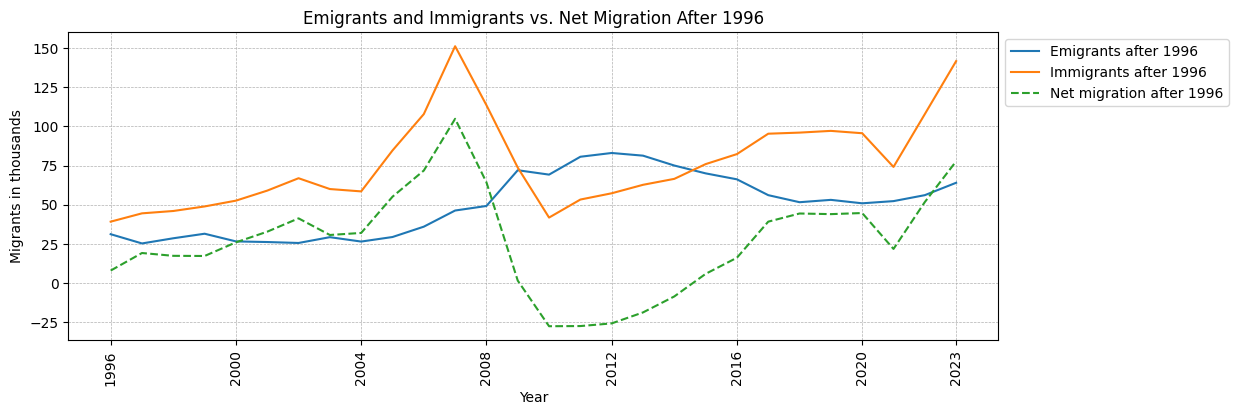

In [53]:
plt.figure(figsize=(12, 4))
plt.plot(migration_years_1996, emigrants_values_1996, label='Emigrants after 1996', marker='')
plt.plot(migration_years_1996, immigrants_values_1996, label='Immigrants after 1996', marker='')
plt.plot(migration_years_1996, net_migration_values_1996, label='Net migration after 1996', linestyle = '--', marker='')
plt.xlabel('Year')
plt.ylabel('Migrants in thousands')
plt.title('Emigrants and Immigrants vs. Net Migration After 1996')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
tick_interval = 4
xticks = [migration_years_1996[0], migration_years_1996[-1]] + list(range(migration_years_1996[0] + tick_interval, migration_years_1996[-1], tick_interval))
plt.xticks(xticks, rotation = 90)
plt.legend(title='Migration')
#plt.ticklabel_format(useOffset=False, style='plain')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### **Measures of Central Tendency, Variability and Additional Summary Statistics:**

Prepared for both sex (male and female) population values taking all ages from under 1 to 99 and over.

In [54]:
population_df_1996_filtered = population_df_1996[(population_df_1996['Single Year of Age'] == 'All ages') & (population_df_1996['Sex'] == 'Both sexes')]
migration_df_1996_filtered = migration_df_1996[(migration_df_1996['Sex'] == 'Both sexes') & (migration_df_1996['Country'] == 'All countries') & (migration_df_1996['Origin or Destination'] == 'Net migration')]
migration_df_1996_filtered['VALUE'] = migration_df_1996_filtered['VALUE'] * 1000

In [55]:
# Measures of Central Tendency for the population dataset
population_mean = population_df_1996_filtered['VALUE'].mean()
population_median = population_df_1996_filtered['VALUE'].median()
population_mode = population_df_1996_filtered['VALUE'].mode()  # The mode can have multiple values

# Measures of Variability for the population dataset
population_std = population_df_1996_filtered['VALUE'].std()
population_variance = population_df_1996_filtered['VALUE'].var()
population_range = population_df_1996_filtered['VALUE'].max() - population_df_1996_filtered['VALUE'].min()

# Measures of Central Tendency for the migration dataset
migration_mean = migration_df_1996_filtered['VALUE'].mean()
migration_median = migration_df_1996_filtered['VALUE'].median()
migration_mode = migration_df_1996_filtered['VALUE'].mode()

# Measures of Variability for the migration dataset
migration_std = migration_df_1996_filtered['VALUE'].std()
migration_variance = migration_df_1996_filtered['VALUE'].var()
migration_range = migration_df_1996_filtered['VALUE'].max() - migration_df_1996_filtered['VALUE'].min()

print(f"Population Mean: {population_mean:.2f}")
print(f"Population Median: {population_median:.2f}")
print(f"Population Mode: {population_mode}")

print(f"Population Standard Deviation: {population_std:.2f}")
print(f"Population Variance: {population_variance:.2f}")
print(f"Population Range: {population_range}")


Population Mean: 4418228.79
Population Median: 4544079.00
Population Mode: 0     3626087
1     3664313
2     3703082
3     3741647
4     3789536
5     3847198
6     3917203
7     3979853
8     4045188
9     4133839
10    4232929
11    4375842
12    4485070
13    4533395
14    4554763
15    4574888
16    4593697
17    4614669
18    4645440
19    4687787
20    4739597
21    4810895
22    4884896
23    4958471
24    5029875
25    5074668
26    5183966
27    5281612
Name: VALUE, dtype: int64
Population Standard Deviation: 499787.62
Population Variance: 249787665536.10
Population Range: 1655525


We can get the following insights from: 

- The average population for the selected date range(1996-2023) is 4,418,228.79. 
- The median is 4,544,079.00 when ordered from lowest to highest. This means that  this value would sit at the center of an ordered list with all values from smallest to highest, with an equal number of population figures above and below it.
- Having so many mode values, means that in fact we do not have a mode value in this dataset. The mode is the most common value, but since population changes every year there is no such value within the data.
- The average distance of the population figures from the mean is 499,787.62. This is a measure of how spread out the population sizes are. 
- Variance - this is the standard deviation squared
- Range - this is the difference between the largest and smallest values. This shows the span of population sizes in the dataset. From the data we can see that in fact the smallest value is for the first year in our dataset being 1996, and the highest is for the last year being 2023. 

In [56]:
print(f"\nMigration Mean: {migration_mean:.2f}")
print(f"Migration Median: {migration_median:.2f}")
print(f"Migration Mode: {migration_mode}")

print(f"Migration Standard Deviation: {migration_std:.2f}")
print(f"Migration Variance: {migration_variance:.2f}")
print(f"Migration Range: {migration_range}")



Migration Mean: 27146.43
Migration Median: 28350.00
Migration Mode: 0     -27500.0
1     -27400.0
2     -25700.0
3     -18700.0
4      -8500.0
5       1600.0
6       5900.0
7       8000.0
8      16200.0
9      17300.0
10     17400.0
11     19200.0
12     21800.0
13     26000.0
14     30700.0
15     32000.0
16     32800.0
17     39200.0
18     41300.0
19     44000.0
20     44400.0
21     44700.0
22     51700.0
23     55100.0
24     64300.0
25     71800.0
26     77700.0
27    104800.0
Name: VALUE, dtype: float64
Migration Standard Deviation: 32574.84
Migration Variance: 1061120357.14
Migration Range: 132300.0


We can get the following insights from: 

- The average net miogration for the selected date range(1996-2023) is 27146.43. 
- The median is 28350 when ordered from lowest to highest. 
- Having so many mode values, means that in fact we do not have a mode value in this dataset. The mode is the most common value, but since net migration changes every year there is no such value within the data.
- The average distance of the migration figures from the mean is 32,574.84, which is quite high relative to the mean, suggesting that there is a wide variation in migration figures.
- Variance - this is the standard deviation squared
- Range - this is the difference between the largest and smallest values. This shows the span of migration sizes in the dataset - 132,300.0. 

Exporting already cleaned and sorted dataframes.

In [57]:
#population_df.to_csv("population_df.csv", index = False)
#migration_df.to_csv("migration_df.csv", index = False)
population_df_1996.to_csv('population_df_1996.csv', index=False)
migration_df_1996.to_csv('migration_df_1996.csv', index=False)